# Regexps:

###### Text:  
02 15:11:28.242069 31983 solver.cpp:341] Iteration 5655, Testing net (#0)  
I1202 15:11:36.076130   374 blocking_queue.cpp:50] Waiting for data  
I1202 15:11:52.472803 31983 solver.cpp:409]     Test net output #0: accuracy = 0.873288  
I1202 15:11:52.472913 31983 solver.cpp:409]     Test net output #1: loss = 0.605587 (* 1 = 0.605587 loss)  

###### Regexp:  
(?<=Iteration )(.*)(?=, Testing net)  
Result:  
5655  
###### Regexp:  
(?<=accuracy = )(.*)  
Result:  
0.873288
###### Regexp:  
(?<=Test net output #1: loss = )(.*)(?= \()
Result:  
0.605587 

###### Text:
I1202 22:45:56.858299 31983 solver.cpp:237] Iteration 77500, loss = 0.000596309  
I1202 22:45:56.858502 31983 solver.cpp:253]     Train net output #0: loss = 0.000596309 (* 1 = 0.000596309 loss)  

###### Regexp:  
(?<=Iteration )(.*)(?=, loss)  
Result:  
77500  
###### Regexp:  
(?<=Train net output #0: loss = )(.*)(?= \()  
Result:  
0.000596309  
  
  
###### Text: 
test_iter: 1456
test_interval: 4349
base_lr: 5e-05
display: 1000
max_iter: 4000
lr_policy: "fixed"
momentum: 0.9
weight_decay: 0.004
snapshot: 2000  
  
###### Regexp:  
(?<=base_lr: )(.*)(?=)  
Result:  
5e-05

imports, and setting for pretty plots.

In [14]:
import matplotlib as mpl


import seaborn as sns
sns.set(style='ticks', palette='Set2')
sns.despine()

import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 20 
mpl.rcParams['ytick.labelsize'] = 20 
%matplotlib inline

import re
import os

from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import ttest_rel as ttest

import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

pgf_with_rc_fonts = {
    "font.family": "serif",
}
mpl.rcParams.update(pgf_with_rc_fonts)

In [2]:
test_iteration_regex = re.compile("(?<=Iteration )(.*)(?=, Testing net)")
test_accuracy_regex = re.compile("(?<=accuracy = )(.*)")
test_loss_regex = re.compile("(?<=Test net output #1: loss = )(.*)(?= \()")

train_iteration_regex = re.compile("(?<=Iteration )(.*)(?=, loss)")
train_loss_regex = re.compile("(?<=Train net output #0: loss = )(.*)(?= \()")

learning_rate_regex = re.compile("(?<=base_lr: )(.*)(?=)")


In [3]:
def create_empty_regexp_dict():
    regexps_dict = {test_iteration_regex: [], test_accuracy_regex: [], test_loss_regex: [],
              train_iteration_regex: [], train_loss_regex: [], 
                   learning_rate_regex: []}
    return regexps_dict

def search_regexps_in_file(regexp_dict, file_name):
    with open(file_name) as opened_file:
        for line in opened_file:
            for regexp in regexp_dict:
                matches = regexp.search(line)
                # Assuming only one match was found
                if matches: regexp_dict[regexp].append(float(regexp.search(line).group()))
    

In [10]:
rgb_dict = create_empty_regexp_dict()
search_regexps_in_file(rgb_dict, '/home/noa/pcl_proj/experiments/cifar10/every_fifth_view/0702/rgb/log.log')

hist_dict = create_empty_regexp_dict()
search_regexps_in_file(hist_dict, '/home/noa/pcl_proj/experiments/cifar10/every_fifth_view/0702/hist/log.log')

rgb_hist_dict = create_empty_regexp_dict()
search_regexps_in_file(rgb_hist_dict, '/home/noa/pcl_proj/experiments/cifar10/every_fifth_view/0702/rgb_hist/log.log')


In [11]:
print rgb_dict[learning_rate_regex][0]

0.001


In [17]:
dates_list = ['1601', '1801', '2101', '2701', '0302', '0702', '0902', '1202']

acc = [[],[],[]]
for date_dir in dates_list:
    rgb_dict = create_empty_regexp_dict()
    search_regexps_in_file(rgb_dict, '/home/noa/pcl_proj/experiments/cifar10/every_fifth_view/'+ 
                           date_dir +'/rgb/log.log')

    hist_dict = create_empty_regexp_dict()
    search_regexps_in_file(hist_dict, '/home/noa/pcl_proj/experiments/cifar10/every_fifth_view/'
                           + date_dir+ '/hist/log.log')

    rgb_hist_dict = create_empty_regexp_dict()
    search_regexps_in_file(rgb_hist_dict, '/home/noa/pcl_proj/experiments/cifar10/every_fifth_view/'
                           +date_dir+'/rgb_hist/log.log')
    
    acc[0].append(rgb_dict[test_accuracy_regex][-1])
    acc[1].append(hist_dict[test_accuracy_regex][-1])
    acc[2].append(rgb_hist_dict[test_accuracy_regex][-1])

In [18]:
print np.array(acc[0]).mean()
print np.array(acc[0]).std()
print np.array(acc[1]).mean()
print np.array(acc[1]).std()
print np.array(acc[2]).mean()
print np.array(acc[2]).std()

0.797413375
0.0670550883676
0.663382
0.0630766907324
0.856194
0.0637660614728


In [21]:
_, p_1 = ttest(np.array(acc[0]), np.array(acc[1]))
_, p_2 = ttest(np.array(acc[0]), np.array(acc[2]))
_, p_3 = ttest(np.array(acc[2]), np.array(acc[1]))

In [22]:
print 'rgb vs. hist:'
print p_1
print 'rgb vs. rgb_hist'
print p_2
print 'hist vs, rgb_hist'
print p_3

rgb vs. hist:
0.000832760333593
rgb vs. rgb_hist
0.0160929192832
hist vs, rgb_hist
9.59061672747e-05


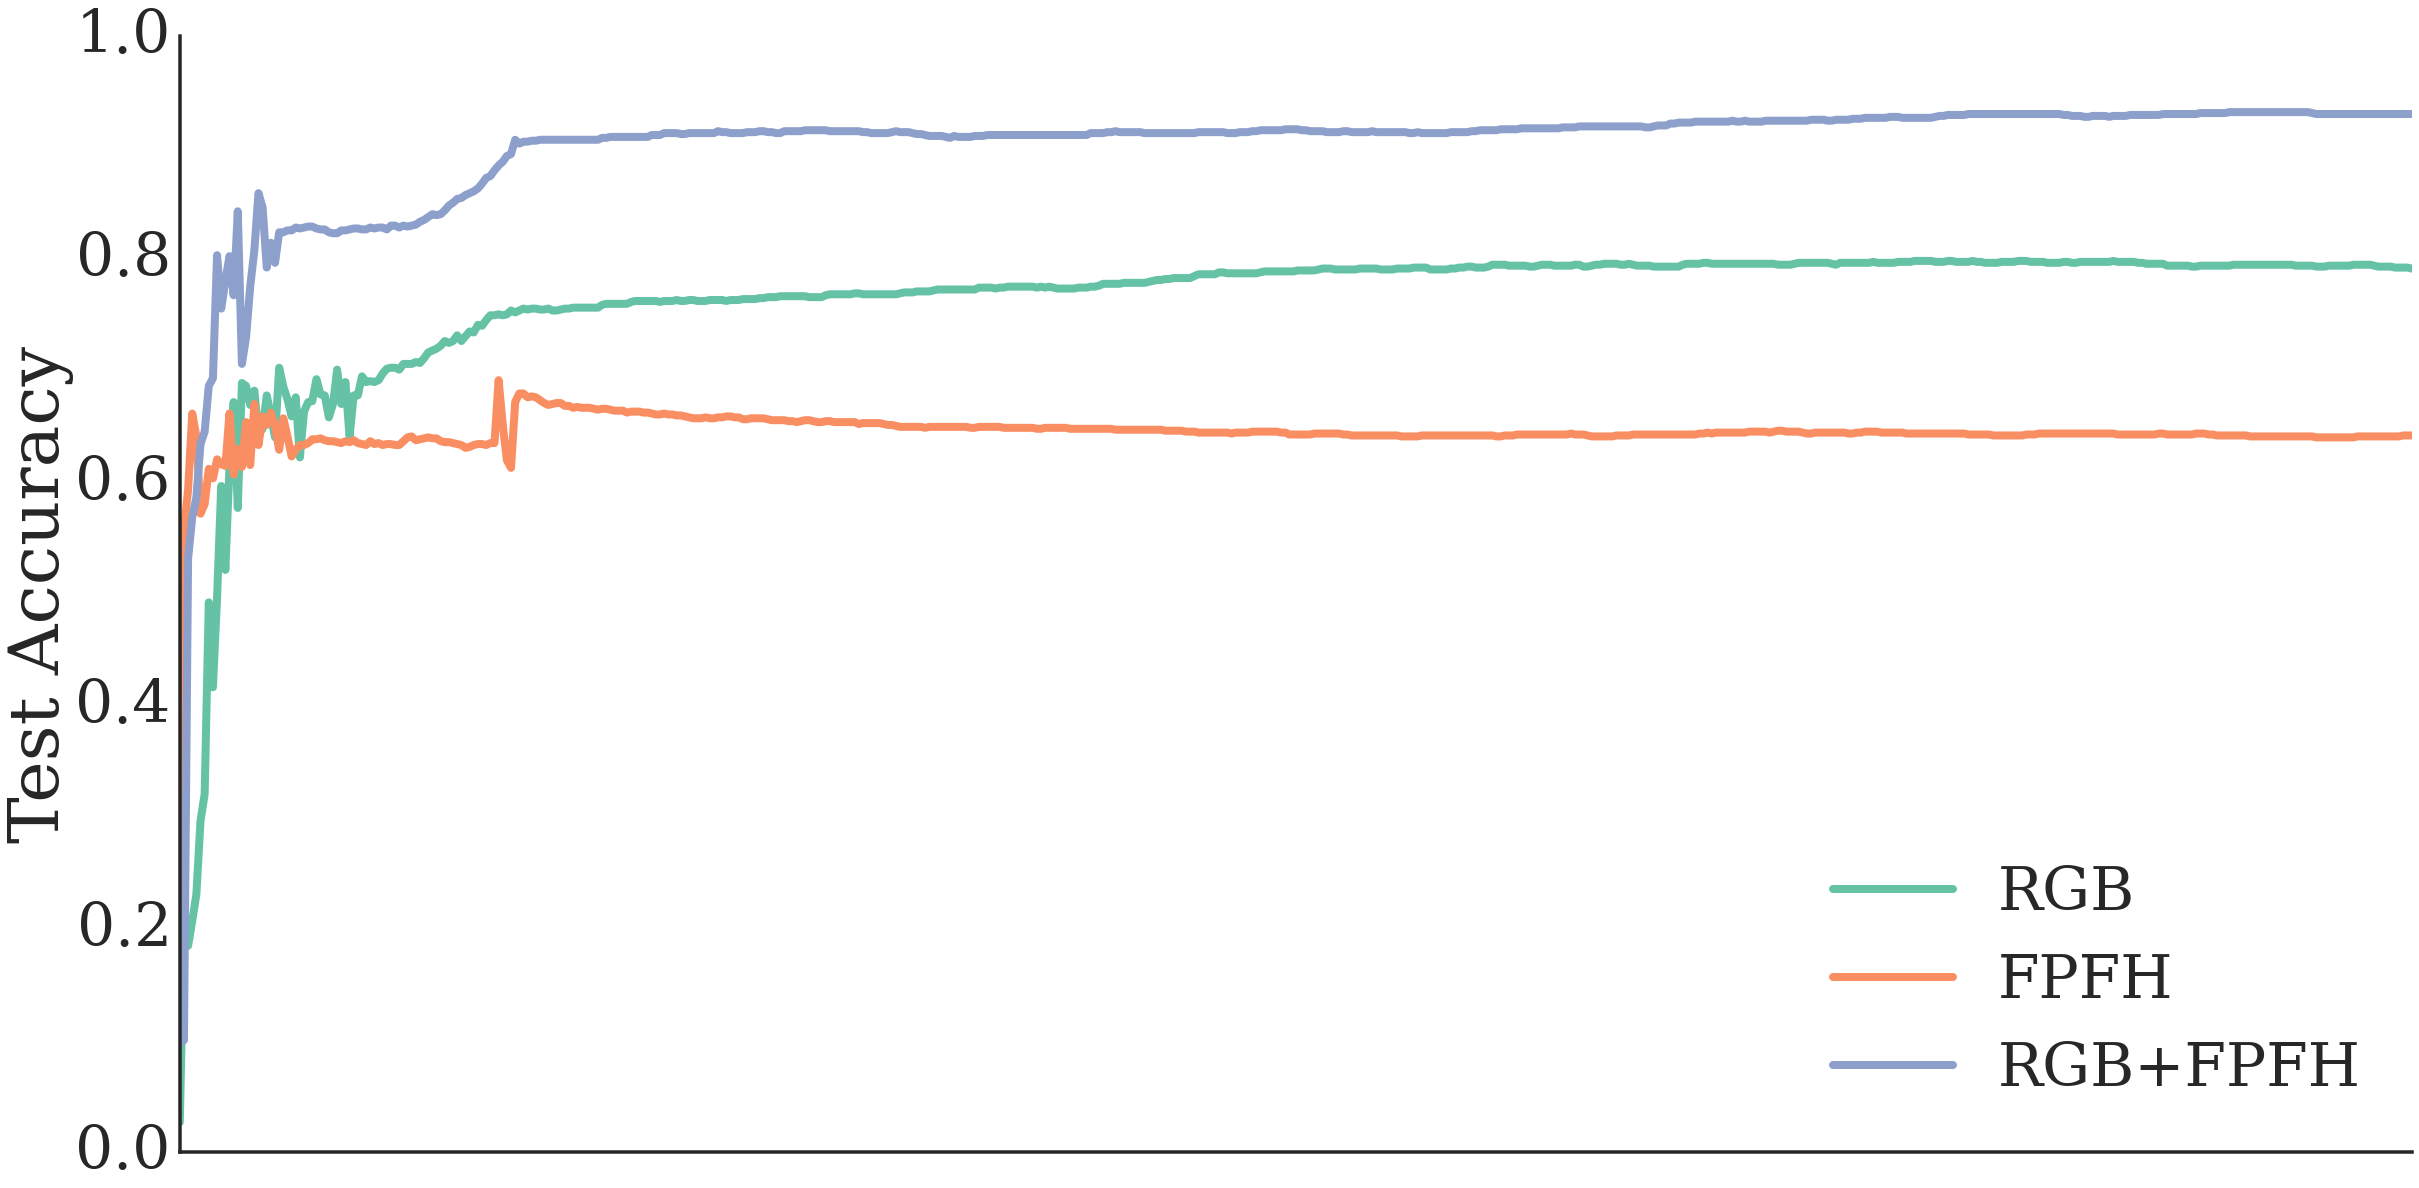

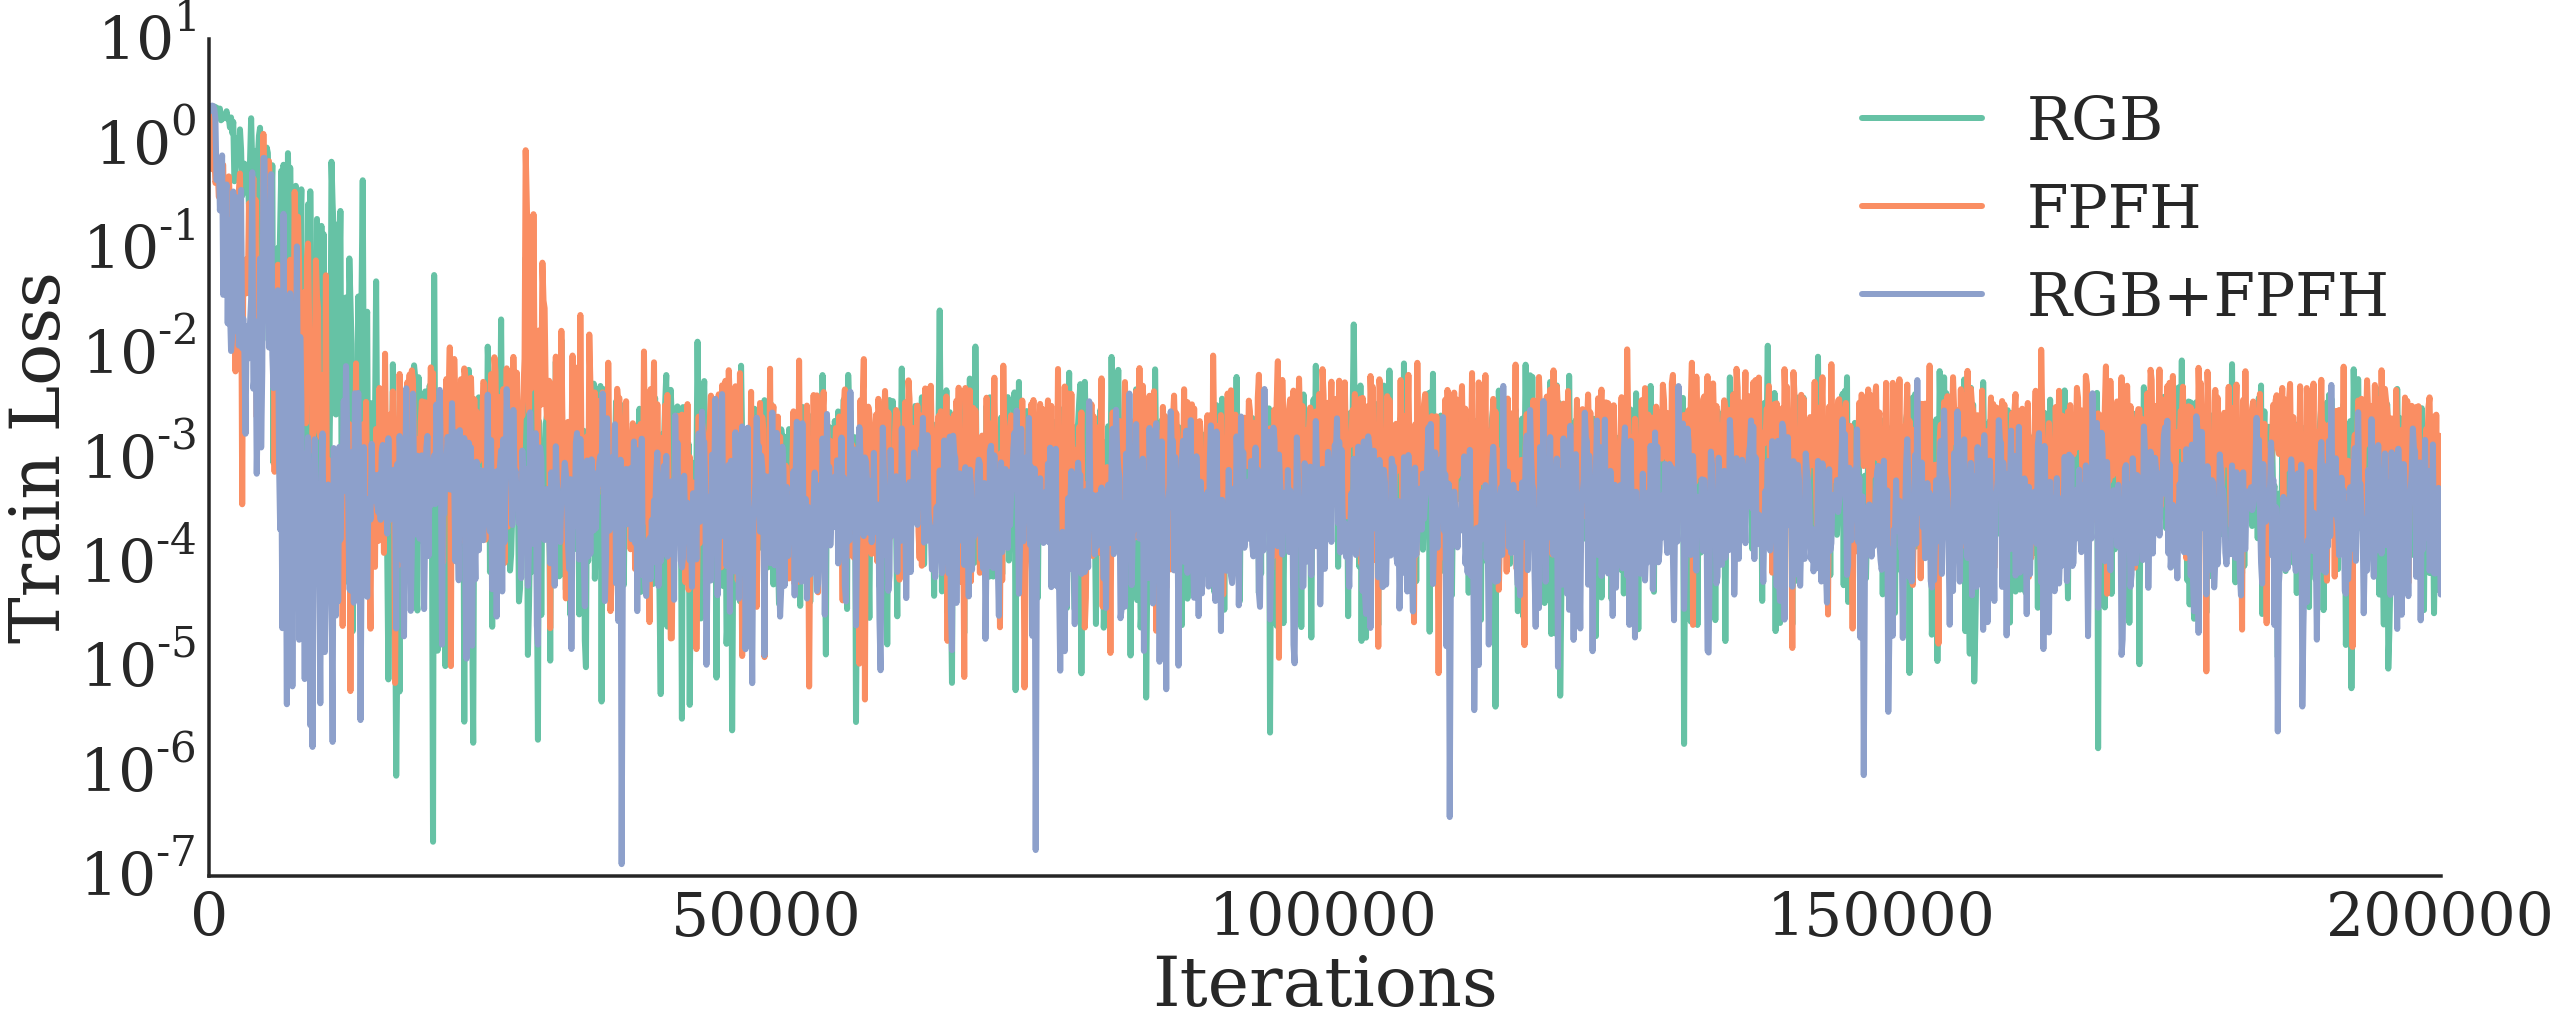

In [12]:
#csfont = {'fontname':'Comic Sans MS'}
#hfont = {'fontname':'Helvetica'}

fig2, axs2 = plt.subplots(1,1, figsize=(40, 20), facecolor='w', edgecolor='k', sharex=True)
spines_to_remove = ['top', 'right']
for spine in spines_to_remove:
    axs2.spines[spine].set_visible(False)
axs2.spines['bottom'].set_linewidth(3.5)
axs2.spines['left'].set_linewidth(3.5)
#axs2.set_title('Test set accuracy and loss', fontsize=20)
axs2.xaxis.set_ticks_position('none')
axs2.yaxis.set_ticks_position('none')
axs2.plot(rgb_dict[test_iteration_regex], rgb_dict[test_accuracy_regex], label='RGB', linewidth=8.0)
axs2.plot(hist_dict[test_iteration_regex], hist_dict[test_accuracy_regex], label='FPFH', linewidth=8.0)
axs2.plot(rgb_hist_dict[test_iteration_regex], rgb_hist_dict[test_accuracy_regex], label='RGB+FPFH', linewidth=8.0)
axs2.legend(loc=4, fontsize=60)
axs2.set_ylabel('Test Accuracy', fontsize=70)
plt.yticks(fontsize = 60)
axs2.axes.get_xaxis().set_visible(False)
'''for spine in spines_to_remove:
    axs2[1].spines[spine].set_visible(False)
axs2[1].xaxis.set_ticks_position('none')
axs2[1].yaxis.set_ticks_position('none')
axs2[1].plot(rgb_dict[test_iteration_regex], rgb_dict[test_loss_regex], label='rgb')
axs2[1].plot(hist_dict[test_iteration_regex], hist_dict[test_loss_regex], label='histograms')
axs2[1].plot(rgb_hist_dict[test_iteration_regex], rgb_hist_dict[test_loss_regex], label='rgb+histograms')
axs2[1].legend(fontsize=18)
plt.ylabel('Test Accuracy', fontsize=18)
plt.xlabel('Iterations', fontsize=18)'''
#plt.xlim(0,3000)
plt.show()


fig2, axs2 = plt.subplots(1,1, figsize=(40, 15), facecolor='w', edgecolor='k', sharex=True)
for spine in spines_to_remove:
    axs2.spines[spine].set_visible(False)
axs2.spines['bottom'].set_linewidth(3.5)
axs2.spines['left'].set_linewidth(3.5)
axs2.xaxis.set_ticks_position('none')
axs2.yaxis.set_ticks_position('none')
axs2.set_yscale('log')
axs2.plot(rgb_dict[train_iteration_regex], (np.array(rgb_dict[train_loss_regex])), label='RGB', linewidth=6.0)
axs2.plot(hist_dict[train_iteration_regex], (np.array(hist_dict[train_loss_regex])), label='FPFH', linewidth=6.0)
axs2.plot(rgb_hist_dict[train_iteration_regex], (np.array(rgb_hist_dict[train_loss_regex])), label='RGB+FPFH', linewidth=6.0)
#axs2.set_title('Training set loss (log-scale)', fontsize=20)
axs2.legend(fontsize=60)
plt.ylabel('Train Loss', fontsize=70)
plt.xlabel('Iterations', fontsize=70)
plt.yticks(fontsize = 60)
plt.xticks(fontsize = 60)

plt.show()
#plt.xlim(47800,48000)

